# Задание

In [2]:
!pip install sympy                      # Установка библиотеки sympy с помощью pip.
import sympy as sp                      # Импорт библиотеки sympy как sp. Она используется для символьных вычислений.
import numpy as np                      # Импорт библиотеки Numpy как np. Она используется для работы с массивами и матрицами в Python.
import matplotlib.pyplot as plt         # Импорт библиотеки Matplotlib.pyplot как plt. Она используется для создания графиков и визуализации данных.
from sympy import symbols, diff, pprint # Импорт 3-х необходимых функции из библиотеки SymPy.


## Task 1
1. Установи библиотеку `sympy`.
2. Используя ее функции, напиши свою функцию, которая
на вход примет математическую функцию `y=f(x)` вида `x**2 - x + 21`, и вернёт производную: `2𝑥−1`.

In [3]:
x = symbols('x')    # Задаем символьную переменную 'x'.
f = x**2 - x + 21   # Задаем функцию 'f'.
result = diff(f, x) # Вычисляем производную функции 'f' по переменной 'x'.
pprint(result)      # Выводим результат в красивом математическом виде.


2⋅x - 1


## Task 2
1. Напиши функцию, которая на вход примет математическую функцию `p = f(x, y)`,
зависящую от двух переменных вида `(x-y)**2`, а также ту переменную, по которой нужно посчитать частную производную.
Функция должна вернуть частную производную по выбранной переменной.

In [4]:
import sympy as sp
from sympy import pprint
x, y = sp.symbols('x y')        # Создаем символьные переменные 'x' и 'y'.
def f(expr_str, var):
    expr = sp.sympify(expr_str) # Преобразуем строку expr_str в символьное выражение.
    try:
       der = sp.diff(expr, var) # Вычесляем частную производную выражения expr по переменной var.
       return der               # Возвращаем найденную частную производную.
    except ValueError:
        return f"Выберите 'x' или 'y' в качестве переменной для производной."
        # В случае неверного выбора переменной выводим сообщение об ошибке.

expr_str = '(x-y)**2'  # Задаем функцию.

der_x = f(expr_str, x) # Вычисляем частную производную по 'x'.
der_y = f(expr_str, y) # Вычисляем частную производную по 'y'.

# Выводим результаты с использованием pprint.
print("Производная по 'x':")
pprint(der_x, use_unicode=True)
print("Производная по 'y':")
pprint(der_y, use_unicode=True)



Производная по 'x':
2⋅x - 2⋅y
Производная по 'y':
-2⋅x + 2⋅y


## Task 3

Представь, что у нас есть истинное значений `y_true` и предсказанное значение `y_pred`, описанное линейнным уравнением вида `y_pred = w*x + b`
1. Выведите формулу квадратного отклонения между истинным и предсказанным значениями.
2. Вычислите частные производные полученной формулу квадратного отклонения по переменным `w` и `b`.

In [ ]:
x, y, w, b = symbols('x y w b') # Определение символьных переменных.
y_pred = w * x + b              # Уравнение для предсказанных значений.
y_true = y                      # y_true - это истинное значение, которое мы хотим сравнить с предсказанным значением y_pred.
mse = (y - y_pred)**2           # Формула квадратного отклонения (MSE).
gradient_w = diff(mse, w)       # Вычисление частной производной MSE по 'w'
gradient_b = diff(mse, b)       # Вычисление частной производной MSE по 'b'

print("Градиент для w:")
pprint(gradient_w, use_unicode=True)

print("Градиент для b:")
pprint(gradient_b, use_unicode=True)

Градиент для w:
-2⋅x⋅(-b - w⋅x + y)
Градиент для b:
2⋅b + 2⋅w⋅x - 2⋅y


## Task 4
Теперь мы с вами подошли к самому главному - реализации алгоритма [градиентного спуска](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D0%BF%D1%83%D1%81%D0%BA%D0%B0).
1. В этот раз тебе нужно написать класс `Gradient()`, который будет состоять из нескольких методов. Объект при
инициализации получает два вектора: `X`, `Y`. Далее методы обращаются к ним уже внутри класса:
     * `predict`: на вход она получает `w`, `b`, на выход она выдаёт прогнозные значения `Y_pred`;
     * `mse`: на вход она получает `Y_pred`, на выход выдает посчитанное MSE;
     * `update`: на вход она получает `w`, `b` и `a` (наш learning rate). Сделайте по умолчанию значение `a=0.0001`. А на \
выходe метод выдаёт новые значения `w`, `b`, которые обновились благодаря посчитанным градиентам.
2. Проверь работу методов, подав на вход класса два вектора `X`, `Y` и начальные параметры `w`, `b` в требуемые методы.

P.S. Тут лучше все писать через numpy, потому что все вычисления будут в векторном виде. Через numpy это будет сделать удобнее)

In [ ]:
X = np.array(
    [32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841,
     52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488,
     44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685,
     45.61864377, 38.81681754]
)
Y = np.array(
    [31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827,
     79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676,
     62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686,
     48.84715332, 56.87721319]
)

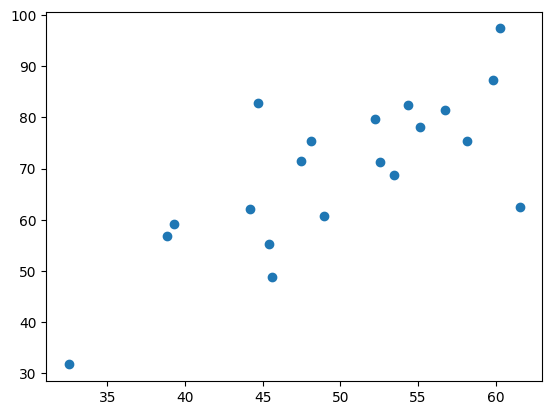

In [ ]:
plt.scatter(X, Y);

In [ ]:
class Gradient:
    def __init__(self, X, Y):         # Инициализация класса. X - набор данных признаков, Y - набор истинных значений.
        self.X = X                    # Сохраняем данные признаков в объекте класса.
        self.Y = Y                    # Сохраняем истинные значения в объекте класса.

    def predict(self, w, b):          # Метод для вычисления прогнозных значений на основе весов w и сдвига b.
        return w * self.X + b         # Линейное уравнение для предсказаний.

    def mse(self, w, b):              # Метод для вычисления среднеквадратичной ошибки (MSE) между истинными и прогнозными значениями.
        Y_pred = self.predict(w, b)   # Получаем прогнозные значения.
        return ((self.Y - Y_pred) ** 2).mean() # Вычисляем MSE.

    def update(self, w, b, a=0.0001): # Метод для обновления весов w и сдвига b с использованием градиентного спуска.
        n = len(self.Y)               # Получаем количество элементов в выборке.
        Y_pred = self.predict(w, b)   # Получаем прогнозные значения.

        # Вычисляем градиенты
        dw = -2 / n * sum(self.X * (self.Y - Y_pred)) # Градиент для w.
        db = -2 / n * sum(self.Y - Y_pred)            # Градиент для b.

        # Обновляем веса с учетом learning rate (a).

        w -= a * dw   # Обновление весов w.
        b -= a * db   # Обновление сдвига b.

        return w, b   # Возвращаем обновленные веса и сдвиг.

w = 0.5               # Задаем начальное значение веса w.
b = 4                 # Задаем начальное значение сдвига b.

grad = Gradient(X, Y) # Создаем объект класса Gradient, передавая ему данные X и Y.

Y_pred = grad.predict(w, b) # Вычисляем прогнозные значения Y_pred на основе начальных весов w и сдвига b.

print(f'mse = {grad.mse(w, b)}') # Выводим значение среднеквадратичной ошибки (MSE) между истинными Y и Y_pred.

# Обновляем значения веса w и сдвига b с использованием градиентного спуска и сохраняем новые значения в переменных w_new и b_new.
w_new, b_new = grad.update(w, b)

# Выводим новые значения веса w и сдвига b после обновления.
print(f'w_new = {w_new}')
print(f'b_new = {b_new}')




mse = 1784.8517253411974
w_new = 0.9150528224014477
b_new = 4.00809052559105


## Task 5
Улучшите ваш код таким образом, чтобы появился метод `optimize`. На вход метод принимает `num_iterations`,
`stopping_threshold=0.001`, `a=0.000001`.
Метод должен итеративным образом пройти какое-то количество раз обновление значений `w`, `b`,
придя к оптимальному значению. Критерии останова:
  * если было превышено количество заранее заданных итераций `num_iterations`;
  * если новая итерация выдала разницу между текущей ошибкой и ошибкой прошлой итерации значение, меньшее, чем `stopping_threshold`;
  * метод должен вернуть финальные значения `w`, `b`, и `mse`.

In [ ]:
class Gradient:
    def __init__(self, X, Y):
        self.X = X  # Сохраняем данные признаков в объекте класса.
        self.Y = Y  # Сохраняем истинные значения в объекте класса.

    def predict(self, w, b):
        return w * self.X + b  # Линейное уравнение для предсказаний.

    def mse(self, w, b):
        Y_pred = self.predict(w, b)  # Получаем прогнозные значения.
        return ((self.Y - Y_pred) ** 2).mean()  # Вычисляем MSE.

    def update(self, w, b, a=0.0001):
        n = len(self.Y)   # Получаем количество элементов в выборке.
        Y_pred = self.predict(w, b)  # Получаем прогнозные значения.

        # Вычисляем градиенты
        dw = -2 / n * sum(self.X * (self.Y - Y_pred))  # Градиент для w.
        db = -2 / n * sum(self.Y - Y_pred)             # Градиент для b.

        # Обновляем веса с учетом learning rate (a).
        w -= a * dw  # Обновление весов w.
        b -= a * db  # Обновление сдвига b.

        return w, b  # Возвращаем обновленные веса и сдвиг.

    def optimize(self, num_iterations, stopping_threshold=0.001, a=0.000001):
        w, b = 0.5, 4            # Задаем начальные значения веса w и сдвига b.
        prev_mse = float('inf')  # Изначально задаем предыдущее значение MSE как бесконечность.

        for i in range(num_iterations):
            mse_value = self.mse(w, b)  # Вычисляем текущее значение MSE.

            # Проверяем условие останова.
            if abs(prev_mse - mse_value) < stopping_threshold:
                break

            prev_mse = mse_value # Обновляем предыдущее значение MSE.
            w, b = self.update(w, b, a) # Обновляем веса и сдвиг.

        return w, b, mse_value   # Возвращаем финальные значения w, b и MSE.

grad = Gradient(X, Y)               # Создаем объект класса Gradient, передавая ему данные X и Y.
final_w, final_b, final_mse = grad.optimize(num_iterations=1000) # Оптимизируем параметры модели.

print(f'Final w = {final_w}') # Выводим финальное значение веса w.
print(f'Final b = {final_b}') # Выводим финальное значение сдвига b.
print(f'Final MSE = {final_mse}') # Выводим финальное значение MSE.




Final w = 1.3057658636163776
Final b = 4.0155115149294085
Final MSE = 99.39372468794025
